# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 7

Clusterização as avessas

Observe o conjunto de dados abaixo:

![Ex. 7](img/ex-7.png)

Ele possui 2 dimensões e está disponível no diretório da disciplina como ClusterizacaoTrabalho.csv.

Utilizando as técnicas vistas em sala de aula, realize a melhor clusterização possível para esse conjunto.

Dicas:
* O conjunto possui muitos ruídos;
* É possível validar visualmente a clusterização dados que o conjunto possui apenas 2 dimensões.

In [1]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável.
#Neste caso é proveniente da pasta de datasets do Github: https://github.com/fiapIA/modelos_de_ia_e_ml/data

dataset = pd.read_csv('data/7_clusterizacao.csv', sep=';', engine='python')
dataset.head()

,V1,V2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [3]:
# Analisando o tamanho do dataset
dataset.shape

(5000, 2)

In [4]:
# Visão geral dos dados (com DataType)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      5000 non-null   int64
 1   V2      5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [5]:
# Verificaçõ de dados nulos
dataset.isnull().sum()

V1    0
V2    0
dtype: int64

### Total de 5000 registros e 2 colunas. Sem registros vazios e as duas colunas com valores do tipo inteiro. Abaixo o "plot" dos dados:

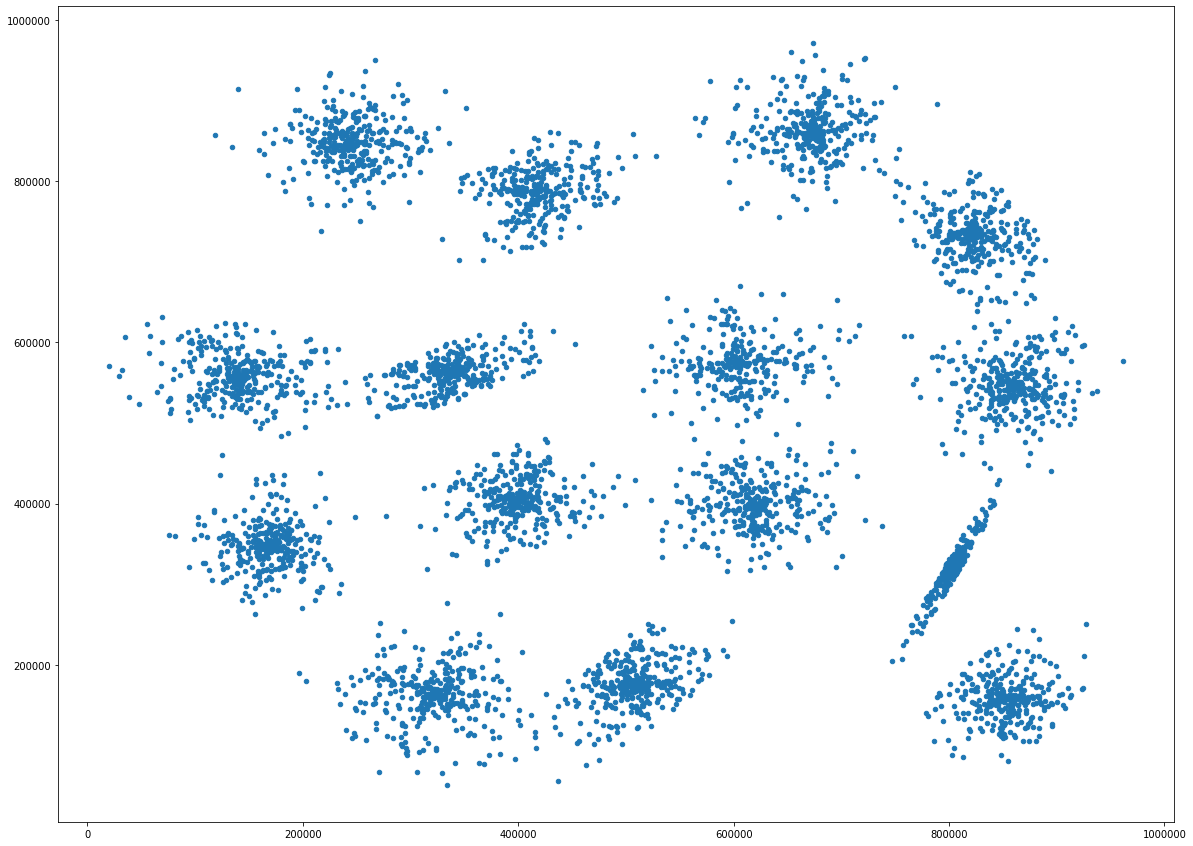

In [6]:
plt.figure(figsize = (20,15))
plt.scatter(dataset['V1'], dataset['V2'], s = 20)
plt.show()

### Olhando a figura acima, os dados parecem estar agrupados em 15 clusters. Portanto, iremos executar o algoritmo do KMeans para K até 20 e verificar o Elbow e o Silhouette Score. 

In [7]:
scores = []
inertias =[]
for i in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(dataset)    
    inertias.append(kmeans.inertia_)
    scores.append(silhouette_score(dataset.values, kmeans.labels_))

100%|██████████| 18/18 [00:13<00:00,  1.38it/s]


### Gráfico Elbow:

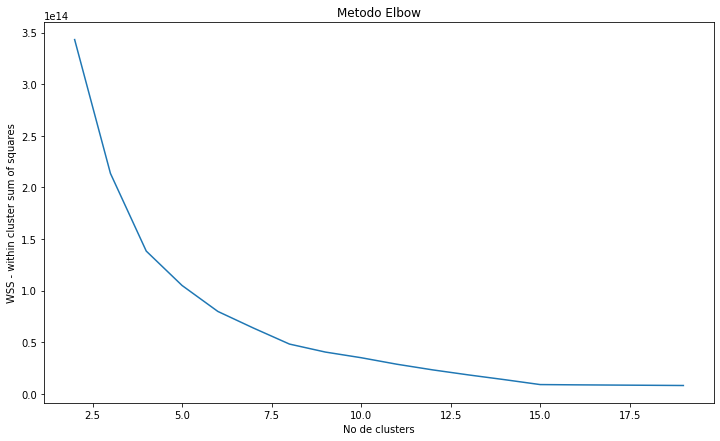

In [8]:
plt.figure(figsize = (12,7))
plt.plot(range(2, 20), inertias)
plt.title('Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

### Gráfico Silhouette Score:

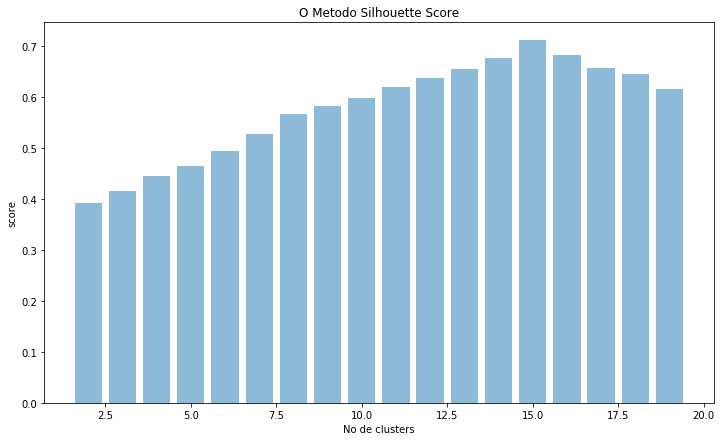

In [9]:
plt.figure(figsize = (12,7))
plt.bar(range(2, 20), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

### Tanto para o Elbow quanto para o Silhouette Score, a melhor configuração de clusters é para K = 15. Portanto, vamos executar o KMeans para K = 15 e ver o resultado dos clusters no gráfico.

In [10]:
bestKmeans = KMeans(n_clusters = 15, max_iter=100).fit(dataset)
clusters = pd.concat([dataset, pd.DataFrame({'cluster':bestKmeans.labels_})], axis=1)
x = dataset.values
labels = bestKmeans.labels_ 

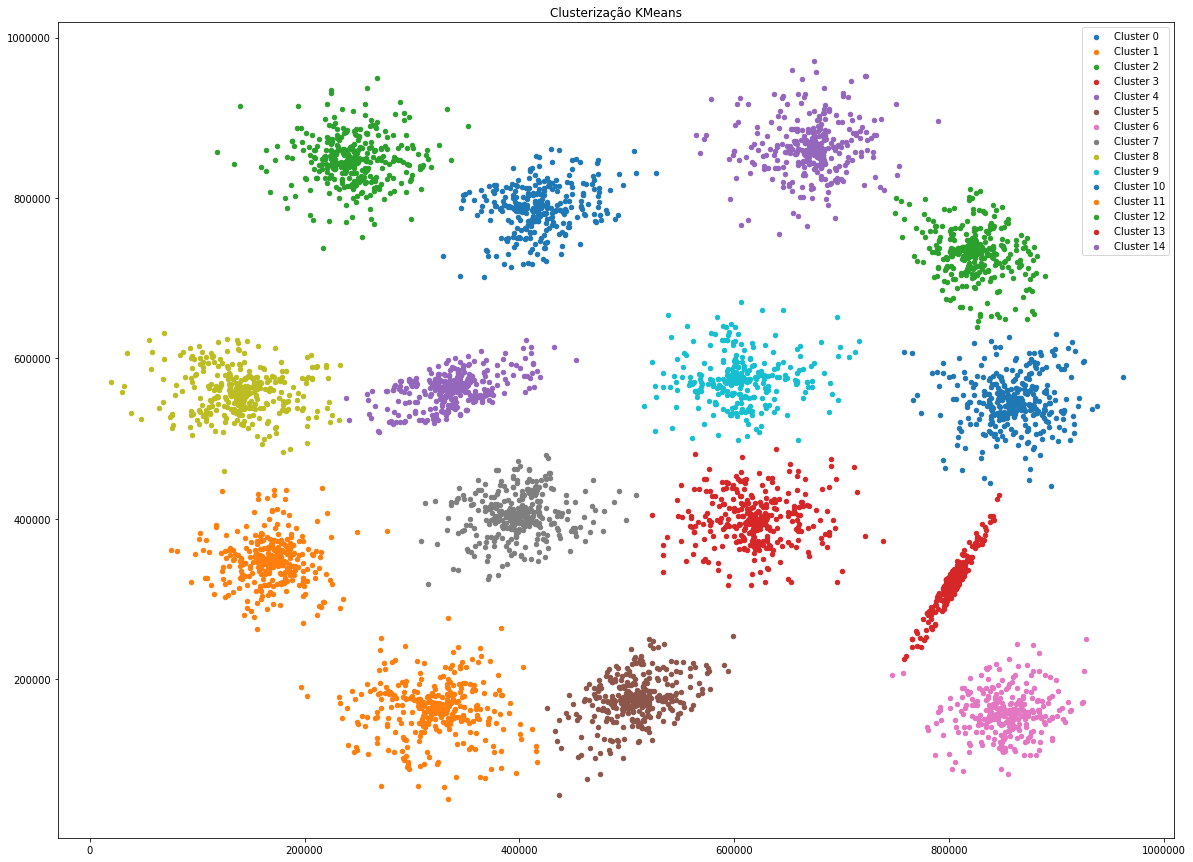

In [11]:
plt.figure(figsize = (20,15))
plt.title('Clusterização KMeans')
for cluster_number in range(0,15):
    label = "Cluster %s" % (cluster_number)
    plt.scatter(x[labels == cluster_number, 0], x[labels == cluster_number, 1], s = 20, label = label)
plt.legend()
plt.show()

## Agora vamos resolver o mesmo problema, mas utilizando o DBScan.

In [12]:
# Primeiro passo é normalizar os dados.
X = StandardScaler().fit_transform(dataset)

### Definimos alguns valores para o EPS (0.5, 0.3, 0.2, 0.1, 0.05, 0.03) e vamos verificar o Silhouette Score para cada um deles.

In [13]:
arr_eps = [0.2, 0.15, 0.125, 0.1, 0.05, 0.03]
for eps_val in arr_eps:
    db = DBSCAN(eps=eps_val, min_samples=20).fit(X)
    labels = db.labels_
    print('-------------')
    print('EPS: {}'.format(eps_val))
    print('Clusters: {}'.format(set(labels)))
    if (len(set(labels)) > 1):
        print('Silhouette Score: {}'.format(silhouette_score(X, labels)))

-------------
EPS: 0.2
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, -1}
Silhouette Score: 0.4909339934889406
-------------
EPS: 0.15
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}
Silhouette Score: 0.6260576663612676
-------------
EPS: 0.125
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}
Silhouette Score: 0.6837550356198948
-------------
EPS: 0.1
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}
Silhouette Score: 0.6384571379907227
-------------
EPS: 0.05
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, -1}
Silhouette Score: 0.10791006386317958
-------------
EPS: 0.03
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}
Silhouette Score: -0.3604542906280769


### Para os dados acima o melhor EPS foi 0.125 que teve Silhouete Score de 0,68 e encontrou 15 clusters. Agora vamos executar o DBScan com EPS 0.125 e ver os clusters no gráfico.

In [14]:
db = DBSCAN(eps=0.125, min_samples=20).fit(X)
dataset['cluster'] = db.labels_
y_dbscan = dataset['cluster'].values

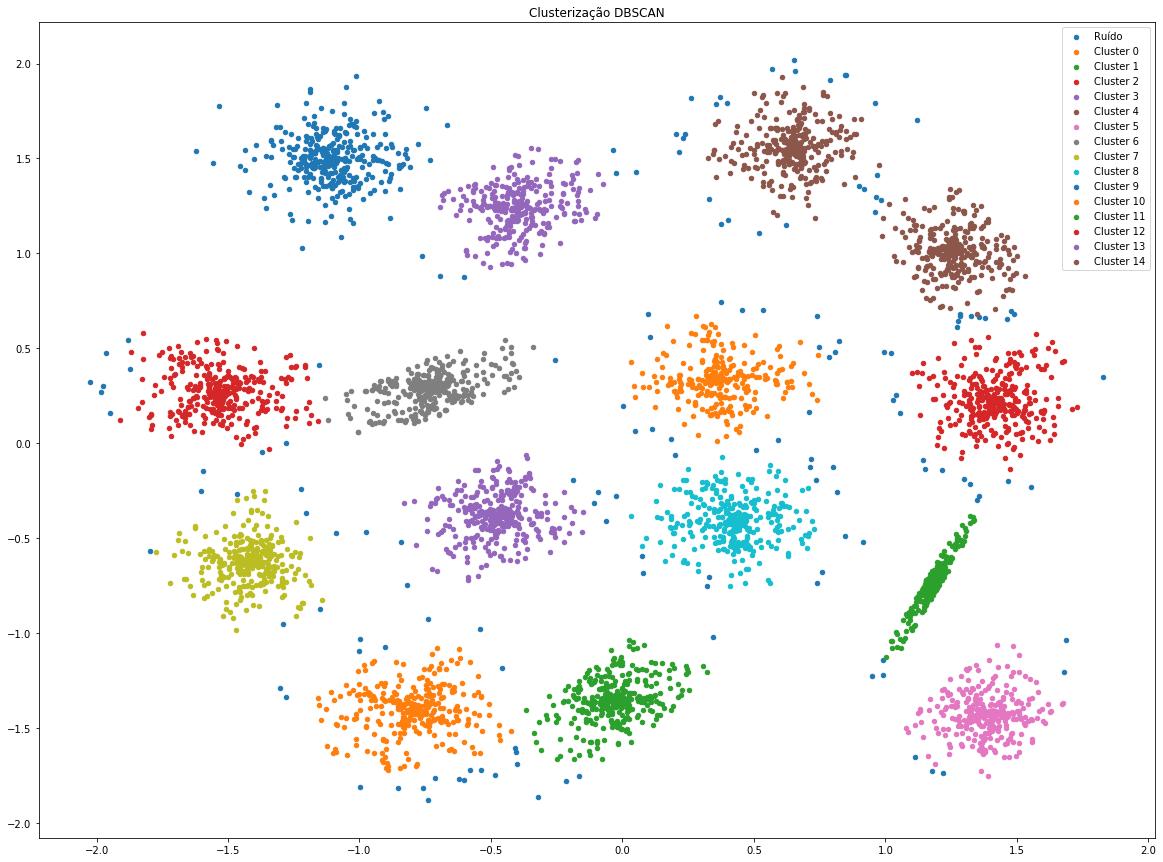

In [15]:
plt.figure(figsize = (20,15))
plt.title('Clusterização DBSCAN')
for cluster_number in range(-1,15):
    if cluster_number >= 0:
        label = "Cluster %s" % (cluster_number)
    else:
        label = "Ruído"
    plt.scatter(X[y_dbscan == cluster_number, 0], X[y_dbscan == cluster_number, 1], s = 20, label = label)
plt.legend()
plt.show()

### No caso do DBScan, conseguimos ver que a quantidade de ruídos no dataset é grande.